# Chapter 2. Small Worlds and Large Worlds

In [29]:
import seaborn as sns
import torch

import pyro
import pyro.distributions as dist

import pandas as pd

from rethinking import MAP, precis

import altair as alt

### Code 2.1

In [15]:
ways = torch.tensor([0., 3, 8, 9, 0])
ways / ways.sum()

tensor([0.0000, 0.1500, 0.4000, 0.4500, 0.0000])

### Code 2.2

In [16]:
dist.Binomial(total_count=9, probs=0.5).log_prob(torch.tensor(6.)).exp()

tensor(0.1641)

### Code 2.3

In [23]:
# define grid
p_grid = torch.linspace(start=0, end=1, steps=20)

# define prior
prior = torch.tensor(1.).repeat(20)

# compute likelihood at each value in grid
likelihood = dist.Binomial(total_count=9,
                           probs=p_grid).log_prob(torch.tensor(6.)).exp()

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()

In [28]:
# posterior = list(posterior)
# print([type(t) for t in posterior])
# posterior = posterior.detach().cpu().numopy()


### Code 2.4

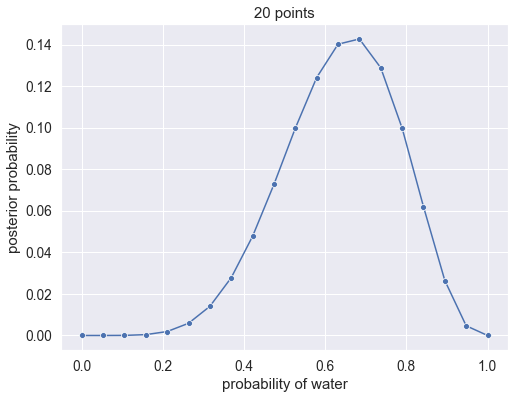

In [32]:
ax = sns.lineplot(x=p_grid.numpy(), y=posterior.numpy(), marker="o")
ax.set(xlabel="probability of water", ylabel="posterior probability",
       title="20 points");

### Code 2.5

In [31]:
dat = pd.DataFrame({'water_prob': p_grid.numpy(), 'posterior': posterior.numpy()})
alt.Chart(dat).mark_line(point=True).encode(
    x='water_prob',
    y='posterior'
)

alt.Chart(...)

In [33]:
prior = torch.where(p_grid < 0.5, torch.tensor(0.), torch.tensor(1.))
prior = (-5 * (p_grid - 0.5).abs()).exp()

### Code 2.6

In [34]:
def model(w):
    p = pyro.sample("p", dist.Uniform(0, 1))  # uniform prior
    pyro.sample("w", dist.Binomial(9, p), obs=w)  # binomial likelihood

globe_qa = MAP(model).run(torch.tensor(6.))

# display summary of quadratic approximation
precis(globe_qa)

,Mean,StdDev,|0.89,0.89|
p,0.65,0.14,0.44,0.87


### Code 2.7

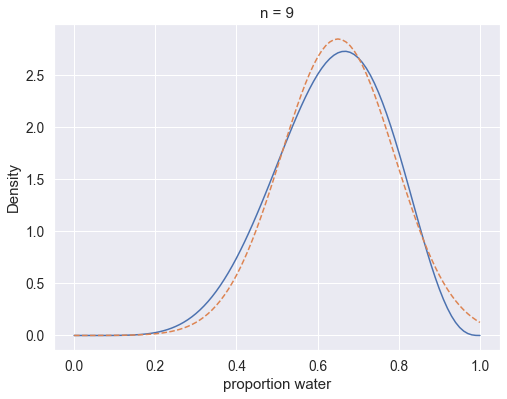

In [38]:
# analytical calculation
w = 6
n = 9
x = torch.linspace(0, 1, 101)
ax = sns.lineplot(x.numpy(), dist.Beta(w + 1, n - w + 1).log_prob(x).exp().numpy())
ax.set(xlabel="proportion water", ylabel="Density", title="n = 9")
# quadratic approximation
precis_df = precis(globe_qa)
sns.lineplot(x, dist.Normal(precis_df["Mean"][0],
                            precis_df["StdDev"][0]).log_prob(x).exp().numpy())
ax.lines[1].set_linestyle("--")